<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-Column-chart" data-toc-modified-id="Create-Column-chart-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create Column chart</a></span></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Helper Functions</a></span><ul class="toc-item"><li><span><a href="#get_budget_class(budget)" data-toc-modified-id="get_budget_class(budget)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>get_budget_class(budget)</a></span></li></ul></li><li><span><a href="#Join-all-the-imdb-data." data-toc-modified-id="Join-all-the-imdb-data.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Join all the imdb data.</a></span><ul class="toc-item"><li><span><a href="#1)-Does-ROI-change-with-amount-spent?" data-toc-modified-id="1)-Does-ROI-change-with-amount-spent?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1) Does ROI change with amount spent?</a></span></li><li><span><a href="#Join-budget-data-with-movie-data-to-explore-genre-profitability" data-toc-modified-id="Join-budget-data-with-movie-data-to-explore-genre-profitability-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Join budget data with movie data to explore genre profitability</a></span></li><li><span><a href="#Create-a-budget-class-feature-in-the-data" data-toc-modified-id="Create-a-budget-class-feature-in-the-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create a budget class feature in the data</a></span></li></ul></li><li><span><a href="#Who-are-the-most-profitable-people-in-the-movie-industry?" data-toc-modified-id="Who-are-the-most-profitable-people-in-the-movie-industry?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Who are the most profitable people in the movie industry?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Who-are-the-most-profitble-directors?" data-toc-modified-id="Who-are-the-most-profitble-directors?-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Who are the most profitble directors?</a></span></li><li><span><a href="#How-many-films-does-each-of-the-top-directors-have?" data-toc-modified-id="How-many-films-does-each-of-the-top-directors-have?-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>How many films does each of the top directors have?</a></span></li></ul></li><li><span><a href="#Who-are-the-most-profitable-directors-for-the-genres-Horror-an-Mystery?" data-toc-modified-id="Who-are-the-most-profitable-directors-for-the-genres-Horror-an-Mystery?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Who are the most profitable directors for the genres Horror an Mystery?</a></span><ul class="toc-item"><li><span><a href="#Create-a-DF-of-only-directors-who-have-never-lost-money-on-a-film." data-toc-modified-id="Create-a-DF-of-only-directors-who-have-never-lost-money-on-a-film.-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Create a DF of only directors who have never lost money on a film.</a></span></li><li><span><a href="#explode-function" data-toc-modified-id="explode-function-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>explode function</a></span></li></ul></li></ul></li></ul></div>

Questions to start with:
1. Are certain Genres more profitable than others?
1. Does ROI change with amount spent?
1. Do certain people generate more ROI than others?
1. Does the rating correlate to ROI? 
1. Are ratings an indicator of boxoffice success?  If not, what is?
1. runtime
1. Makret cap by genre
1. Genre Growth over time
1. Number of prifitable genres by genre


Things to think about:
1. Can we clean first?
2. Can the data be put in a sql database for easy querying?
3. There is a TMDB api
4. there is a kaggle dataset that has film names and ids for rotten tomatoes.
    

Some to do items:
1. create table for people with the movies they worked in and their roles, and roi.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


!ls data/zippedData



bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [2]:
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
print(len(bom_movie_gross))
bom_movie_gross.head()

3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
imdb_name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz', index_col='nconst')
print(len(imdb_name_basics))
imdb_name_basics.head()

606648


,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
# imdb.title.akas.csv.gz
imdb_title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz', index_col='title_id')
print(len(imdb_title_akas))
imdb_title_akas.head()


331703


,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [5]:
# imdb.title.basics.csv.gz
imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', index_col='tconst')
imdb_title_basics.head()


,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# imdb.title.crew.csv.gz
imdb_title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz', index_col='tconst')
imdb_title_crew.head()



,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [7]:
# imdb.title.principals.csv.gz
imdb_title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz', index_col='tconst')
imdb_title_principals.head()


,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [8]:
# imdb.title.ratings.csv.gz
imdb_title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', index_col='tconst')
imdb_title_ratings.head()


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [9]:
# rt.movie_info.tsv.gz
rt_movie_info = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t', index_col='id')
rt_movie_info.head()


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
# rt.reviews.tsv.gz
rt_reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
rt_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
# tmdb.movies.csv.gz
tmdb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
# tn.movie_budgets.csv.gz
tn_movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', index_col='id')
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Create Column chart


In [13]:
pd.Series(imdb_title_akas.columns)

0             ordering
1                title
2               region
3             language
4                types
5           attributes
6    is_original_title
dtype: object

In [14]:
#Cols chart
cols_df =  pd.concat( [pd.Series(bom_movie_gross.columns),
                       pd.Series(imdb_name_basics.columns),
                       pd.Series(imdb_title_akas.columns),
                       pd.Series(imdb_title_basics.columns),
                       pd.Series(imdb_title_crew.columns),
                       pd.Series(imdb_title_principals.columns),
                       pd.Series(imdb_title_ratings.columns),
                       pd.Series(rt_movie_info.columns),
                       pd.Series(rt_reviews.columns),
                       pd.Series(tmdb_movies.columns),
                       pd.Series(tn_movie_budgets.columns)
                      ], axis=1, sort=False)

cols_df.columns = ['bom_movie_gross',
                   'imdb_name_basics.columns',
                   'imdb_title_akas',
                   'imdb_title_basics',
                   'imdb_title_crew',
                   'imdb_title_principals',
                   'imdb_title_ratings',
                   'rt_movie_info',
                   'rt_reviews',
                   'tmdb_movies',
                   'tn_movie_budgets']

cols_df.fillna('')





,bom_movie_gross,imdb_name_basics.columns,imdb_title_akas,imdb_title_basics,imdb_title_crew,imdb_title_principals,imdb_title_ratings,rt_movie_info,rt_reviews,tmdb_movies,tn_movie_budgets
0,title,primary_name,ordering,primary_title,directors,ordering,averagerating,synopsis,id,genre_ids,release_date
1,studio,birth_year,title,original_title,writers,nconst,numvotes,rating,review,id,movie
2,domestic_gross,death_year,region,start_year,,category,,genre,rating,original_language,production_budget
3,foreign_gross,primary_profession,language,runtime_minutes,,job,,director,fresh,original_title,domestic_gross
4,year,known_for_titles,types,genres,,characters,,writer,critic,popularity,worldwide_gross
5,,,attributes,,,,,theater_date,top_critic,release_date,
6,,,is_original_title,,,,,dvd_date,publisher,title,
7,,,,,,,,currency,date,vote_average,
8,,,,,,,,box_office,,vote_count,
9,,,,,,,,runtime,,,


# Helper Functions

## get_budget_class(budget)

In [ ]:
def get_budget_class(budget):
    if budget < 600000:
        return 'under 6m'
    elif budget >= 6000000 and budget < 10000000:
        return '6-10m'
    elif budget >= 10000000 and budget < 14200000:
        return '10-14.2m'
    elif budget >= 14200000:
        return '14.2m +'

# Join all the imdb data.

In [15]:
print(len(imdb_title_basics))
print(len(imdb_title_crew))

print(len(imdb_title_principals))

print(len(imdb_title_ratings))

imdb = imdb_title_basics.join(imdb_title_crew, on='tconst')

#imdb = imdb.join(imdb_title_principals, on="tconst", how='left')

imdb = imdb.join(imdb_title_ratings, on="tconst", how='left')

imdb.head()

146144
146144
1028186
73856


,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
tconst,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN,7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899,6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914",6.5,119.0


In [16]:
print(len(imdb_title_principals))
print(len(imdb_title_ratings))

1028186
73856


In [17]:
imdb_title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [18]:
from pandas_profiling import ProfileReport

# ProfileReport(imdb)

## 1) Does ROI change with amount spent?

In [19]:
tn_movie_budgets.shape

(5782, 5)

In [20]:
bom_movie_gross.shape

(3387, 5)

In [26]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
tn_movie_budgets[cols] = tn_movie_budgets[cols].replace('[^0-9]', '', regex=True).astype('int')

In [37]:
# Drop rows where both domestic_gross and worldwide_gross are 0.
mask = (tn_movie_budgets['domestic_gross'] > 0) | (tn_movie_budgets['worldwide_gross'] > 0)
tn_movie_budgets = tn_movie_budgets.loc[mask]

In [38]:
#add ROI

#Convert strings to numbers
# tn_movie_budgets[['production_budget','domestic_gross', 'worldwide_gross']] = tn_movie_budgets[['production_budget','domestic_gross', 'worldwide_gross']].replace('\$', '', regex=True).replace(',', '', regex=True).astype('int')
tn_movie_budgets['ROI'] = (tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']) / tn_movie_budgets['production_budget']
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,0.046157
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,-0.084594
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108,-0.154097
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,-0.028921
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696,-0.031878


In [39]:
from scipy.stats import zscore
tn_movie_budgets['ROI_zscore'] = zscore(tn_movie_budgets['ROI'])
tn_movie_budgets[tn_movie_budgets['ROI_zscore'] > 3].sort_values(by = 'ROI_zscore', ascending = False).head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1799.000000,58.878063
14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,497.750000,16.192583
93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,430.517853,13.987138
80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,415.564740,13.496624
7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,412.833333,13.407024


(-1.0, 10.0)

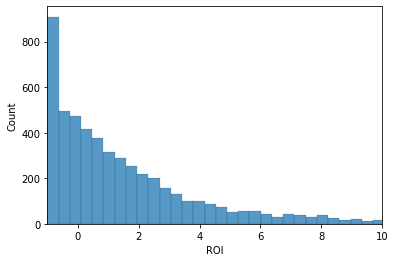

In [40]:
# tn_movie_budgets['ROI'].hist(bins=100)
ax = sns.histplot(data=tn_movie_budgets['ROI'][tn_movie_budgets['ROI_zscore'] <= 3])
ax.set_xlim(-1, 10)

In [41]:
#Drop outliers
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['ROI_zscore'] <=3]

In [42]:
tn_movie_budgets.describe()

,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore
count,5.385000e+03,5.385000e+03,5.385000e+03,5385.000000,5385.000000
mean,3.349094e+07,4.468475e+07,9.777680e+07,2.723784,-0.045981
std,4.253479e+07,6.967913e+07,1.792083e+08,7.045662,0.231122
min,5.000000e+03,0.000000e+00,2.600000e+01,-0.999974,-0.168133
25%,6.400000e+06,3.143056e+06,7.000000e+06,-0.304705,-0.145326
50%,1.910000e+07,2.027806e+07,3.330000e+07,0.871094,-0.106755
75%,4.200000e+07,5.576223e+07,1.044884e+08,2.930805,-0.039190
max,4.250000e+08,9.366622e+08,2.776345e+09,94.576000,2.967088


In [43]:
tn_movie_budgets[(tn_movie_budgets['domestic_gross'] == 0)].head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore
id,,,,,,,
18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,-0.218040,-0.142483
20,"Jan 22, 2019",Renegades,77500000,0,1521672,-0.980366,-0.167490
21,"Oct 26, 2018",Air Strike,65000000,0,516279,-0.992057,-0.167873
26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-0.998362,-0.168080
68,"Dec 31, 2006",Les BronzÃ©s 3: amis pour la vie,42000000,0,83833602,0.996038,-0.102657


In [44]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,0.046157
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,-0.084594
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108,-0.154097
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,-0.028921
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696,-0.031878


In [45]:
#clean up release date and add release year for joining.
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])


In [46]:
tn_movie_budgets['year'] = pd.DatetimeIndex(tn_movie_budgets['release_date']).year

In [47]:
#remove duplicates (some movies are listed multiple times with different specifics)

tn_movie_budgets[tn_movie_budgets.duplicated(subset = ['release_date', 'movie'], keep = False)]


,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year
id,,,,,,,,


In [48]:
tn_movie_budgets[tn_movie_budgets['movie'] == 'Beauty and the Beast']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year
id,,,,,,,,
35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,6.869998,0.090029,2017
86,1991-11-13,Beauty and the Beast,20000000,376057266,608431132,29.421557,0.829798,1991


## Join budget data with movie data to explore genre profitability

In [49]:
imdb.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'directors', 'writers', 'averagerating', 'numvotes'],
      dtype='object')

In [50]:
tn_movie_budgets.set_index('movie')
imdb_budgets_df = tn_movie_budgets.join(imdb.set_index(['primary_title', 'start_year']), on = ['movie', 'year'])
imdb_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes
id,,,,,,,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,5.532577,0.046157,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,-0.084594,2011,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",6.6,447624.0
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.572108,-0.154097,2019,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",6.0,24451.0
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,-0.028921,2015,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",7.3,665594.0
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696,-0.031878,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
imdb_budgets_df[imdb_budgets_df['directors'].str.contains(',').fillna(False)]
#imdb_budgets_df['directors'].str.contains(',')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes
id,,,,,,,,,,,,,,,
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.827114,0.055819,2018,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.5,670926.0
15,2010-11-24,Tangled,260000000,200821936,586477240,1.255682,-0.094140,2010,Tangled,100.0,"Adventure,Animation,Comedy","nm1977355,nm0397174","nm1557594,nm0342278,nm0342303",7.8,366366.0
17,2016-05-06,Captain America: Civil War,250000000,408084349,1140069413,3.560278,-0.018541,2016,Captain America: Civil War,147.0,"Action,Adventure,Sci-Fi","nm0751577,nm0751648","nm1321655,nm1321656,nm0800209,nm0456158,nm2092...",7.8,583507.0
25,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,230000000,172558876,788241137,2.427135,-0.055712,2017,Pirates of the Caribbean: Dead Men Tell No Tales,129.0,"Action,Adventure,Fantasy","nm1461392,nm1650283","nm0622288,nm0744429,nm0254645,nm0064181,nm0938684",6.6,228592.0
46,2016-06-17,Finding Dory,200000000,486295561,1021215193,4.106076,-0.000637,2016,Finding Dory,97.0,"Adventure,Animation,Comedy","nm0004056,nm0533691","nm0004056,nm0835194,nm0677037,nm0533691",7.3,213542.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2011-09-09,Grave Encounters,2000000,0,2151887,0.075943,-0.132839,2011,Grave Encounters,92.0,Horror,"nm4017355,nm3425513,nm4155547","nm4155547,nm3425513,nm4017355",6.1,48125.0
2,2015-03-06,Road Hard,1500000,113169,113169,-0.924554,-0.165659,2015,Road Hard,98.0,Comedy,"nm0004805,nm0376247","nm0004805,nm0376247",6.1,1681.0
75,2011-09-09,Kevin Hart: Laugh at My Pain,750000,7706436,7712436,9.283248,0.169192,2011,Kevin Hart: Laugh at My Pain,89.0,"Comedy,Documentary","nm0806492,nm1103162","nm0366389,nm3156655,nm1830312",7.4,5081.0


In [51]:
imdb_budgets_df[imdb_budgets_df['movie'] == 'Beauty and the Beast']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes
id,,,,,,,,,,,,,,,
35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,6.869998,0.090029,2017,Beauty and the Beast,129.0,"Family,Fantasy,Musical",nm0174374,"nm0154716,nm0818746,nm0941314,nm0207305,nm3343855",7.2,238325.0
86,1991-11-13,Beauty and the Beast,20000000,376057266,608431132,29.421557,0.829798,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
imdb_budgets_df['genres'].isna().sum()

4025

In [53]:
imdb_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5441 entries, 1 to 80
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5441 non-null   datetime64[ns]
 1   movie              5441 non-null   object        
 2   production_budget  5441 non-null   int64         
 3   domestic_gross     5441 non-null   int64         
 4   worldwide_gross    5441 non-null   int64         
 5   ROI                5441 non-null   float64       
 6   ROI_zscore         5441 non-null   float64       
 7   year               5441 non-null   int64         
 8   original_title     1420 non-null   object        
 9   runtime_minutes    1406 non-null   float64       
 10  genres             1416 non-null   object        
 11  directors          1415 non-null   object        
 12  writers            1394 non-null   object        
 13  averagerating      1390 non-null   float64       
 14  numvotes  

In [54]:
imdb_genre_ROI = imdb_budgets_df.dropna(subset=['genres']).copy()
imdb_genre_ROI.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes
id,,,,,,,,,,,,,,,
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,-0.084594,2011,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",6.6,447624.0
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.572108,-0.154097,2019,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",6.0,24451.0
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,-0.028921,2015,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",7.3,665594.0
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.827114,0.055819,2018,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.5,670926.0
9,2017-11-17,Justice League,300000000,229024295,655945209,1.186484,-0.096410,2017,Justice League,120.0,"Action,Adventure,Fantasy",nm0811583,"nm0796950,nm0795975,nm0006516,nm0811583,nm0923...",6.5,329135.0


In [160]:
imdb_genre_ROI[imdb_genre_ROI['directors'].fillna('').str.contains(',')]


,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes,budget_class
id,,,,,,,,,,,,,,,,
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.827114,0.055819,2018,Avengers: Infinity War,149.0,Action,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.5,670926.0,14.2m +
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.827114,0.055819,2018,Avengers: Infinity War,149.0,Adventure,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.5,670926.0,14.2m +
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.827114,0.055819,2018,Avengers: Infinity War,149.0,Sci-Fi,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.5,670926.0,14.2m +
15,2010-11-24,Tangled,260000000,200821936,586477240,1.255682,-0.094140,2010,Tangled,100.0,Adventure,"nm1977355,nm0397174","nm1557594,nm0342278,nm0342303",7.8,366366.0,14.2m +
15,2010-11-24,Tangled,260000000,200821936,586477240,1.255682,-0.094140,2010,Tangled,100.0,Animation,"nm1977355,nm0397174","nm1557594,nm0342278,nm0342303",7.8,366366.0,14.2m +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2015-03-06,Road Hard,1500000,113169,113169,-0.924554,-0.165659,2015,Road Hard,98.0,Comedy,"nm0004805,nm0376247","nm0004805,nm0376247",6.1,1681.0,None
75,2011-09-09,Kevin Hart: Laugh at My Pain,750000,7706436,7712436,9.283248,0.169192,2011,Kevin Hart: Laugh at My Pain,89.0,Comedy,"nm0806492,nm1103162","nm0366389,nm3156655,nm1830312",7.4,5081.0,None
75,2011-09-09,Kevin Hart: Laugh at My Pain,750000,7706436,7712436,9.283248,0.169192,2011,Kevin Hart: Laugh at My Pain,89.0,Documentary,"nm0806492,nm1103162","nm0366389,nm3156655,nm1830312",7.4,5081.0,None


In [55]:
imdb_genre_ROI['genres'] = imdb_genre_ROI['genres'].apply(lambda x: x.split(',')).copy()
imdb_genre_ROI = imdb_genre_ROI.explode('genres')

<AxesSubplot:xlabel='genres'>

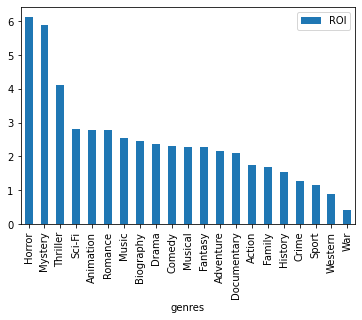

In [56]:
imdb_genre_ROI[['genres', 'ROI']].groupby('genres').mean().sort_values(by = 'ROI', ascending = False).plot.bar()

<AxesSubplot:xlabel='genres'>

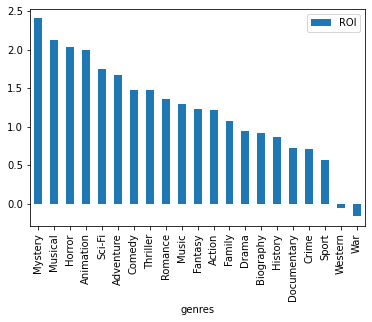

In [57]:
imdb_genre_ROI[['genres', 'ROI']].groupby('genres').median().sort_values(by = 'ROI', ascending = False).plot.bar()

In [58]:
imdb_genre_ROI[['genres', 'ROI']].groupby('genres').count().sort_values(by = 'ROI', ascending = False)

,ROI
genres,
Drama,687
Comedy,489
Action,422
Adventure,343
Thriller,239
Crime,222
Romance,182
Horror,155
Biography,132


In [59]:
imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Musical']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes
id,,,,,,,,,,,,,,,
51,2010-03-05,Alice in Wonderland,200000000,334191110,1025491110,4.127456,0.000064,2010,Alice in Wonderland,99.0,Musical,nm0288188,NaN,6.5,6.0
35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,6.869998,0.090029,2017,Beauty and the Beast,129.0,Musical,nm0174374,"nm0154716,nm0818746,nm0941314,nm0207305,nm3343855",7.2,238325.0
25,2017-12-20,The Greatest Showman,84000000,174340174,386665550,3.603161,-0.017134,2017,The Greatest Showman,105.0,Musical,nm1243905,"nm0081081,nm0174374",7.6,199663.0
29,2012-06-15,Rock of Ages,70000000,38518613,61031932,-0.128115,-0.139533,2012,Rock of Ages,123.0,Musical,nm0788202,"nm0857620,nm0195476,nm1615610",5.9,69910.0
24,2010-11-24,Burlesque,55000000,39440655,90552675,0.646412,-0.114126,2010,Burlesque,119.0,Musical,nm0031078,nm0031078,6.4,71021.0
54,2013-05-31,Yeh Jawaani Hai Deewani,8300000,3827466,50827466,5.123791,0.032748,2013,Yeh Jawaani Hai Deewani,160.0,Musical,nm2209781,"nm4990507,nm2209781",7.1,33971.0
11,2010-07-16,Standing Ovation,5600000,531806,531806,-0.905035,-0.165019,2010,Standing Ovation,105.0,Musical,nm0706296,nm0706296,3.3,658.0
74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,-0.998782,-0.168094,2012,The Ghastly Love of Johnny X,106.0,Musical,nm0120526,"nm1430634,nm0120526,nm1646527,nm0905904",5.7,386.0


In [60]:
print(len(imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Horror']['ROI']))
sns.histplot(imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Horror', hue = genres]['ROI'])


SyntaxError: invalid syntax (<ipython-input-60-934cd26ddf6b>, line 2)

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

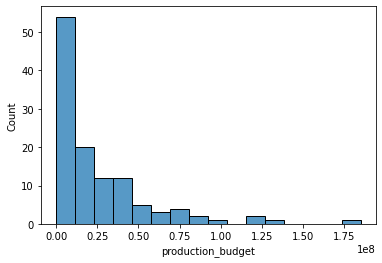

In [61]:
sns.histplot(imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Mystery']['production_budget'])

117


<AxesSubplot:xlabel='ROI', ylabel='Count'>

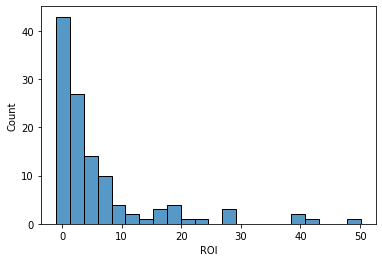

In [62]:
print(len(imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Mystery']['ROI']))
sns.histplot(imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Mystery']['ROI'])


<AxesSubplot:xlabel='production_budget', ylabel='Count'>

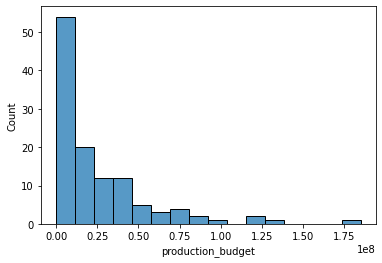

In [63]:
sns.histplot(imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Mystery']['production_budget'])

/Users/benbogart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROI', ylabel='Density'>

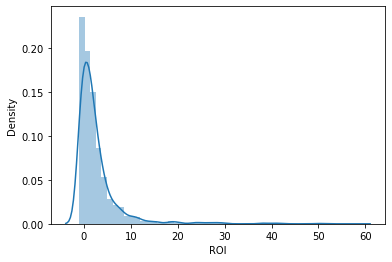

In [64]:
# sns.histplot(imdb_genre_ROI[['genres' ,'ROI']], hue='genres')
# imdb_genre_ROI[imdb_genre_ROI['genres'] == 'Horror'][['genres' ,'ROI']]

sns.distplot(imdb_genre_ROI['ROI'])


# imdb_genre_ROI[['genres' ,'ROI']].reset_index().pivot(columns = 'genres', values='ROI')

# imdb_genre_ROI[['genres' ,'ROI']].reset_index().pivot(columns = 'genres', values='ROI')
# sns.histplot(imdb_genre_ROI[['genres' ,'ROI']], hue='genres')


## Create a budget class feature in the data

Does budget threshold change the ROI distribution?  We could build a a feature and see which does best for ROI.


Here are the thresholds for the various unions:
    
    The DGA and SAG thresholds for low budget are similar: $2.6 and $2.5 million respectively. The writer’s guild draws the line way down at $1.2 million.

    IATSE (the union that covers most of the below-the-line crew) has three different tiers: below $6 million, between $6 and $10 million, and $10 to $14.2 million. (Anything above that is full union rates.) To give you a sense of scale, Get Out only cost $4.5 million. Then again, not paying the crew full union wages and benefits is probably how Blumhouse keep their films profitable.
    
Source: http://www.anonymousproductionassistant.com/2018/01/17/low-budget-movie/


In [65]:
# Moved to helper functions
# def get_budget_class(budget):
#     if budget < 600000:
#         return 'under 6m'
#     elif budget >= 6000000 and budget < 10000000:
#         return '6-10m'
#     elif budget >= 10000000 and budget < 14200000:
#         return '10-14.2m'
#     elif budget >= 14200000:
#         return '14.2m +'
        
imdb_genre_ROI['budget_class'] = imdb_genre_ROI['production_budget'].apply(get_budget_class)

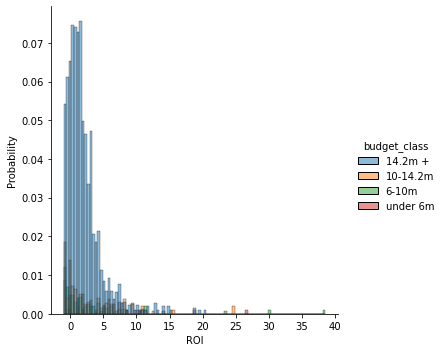

In [66]:
sns.displot(imdb_genre_ROI, x="ROI", hue="budget_class", stat="probability")


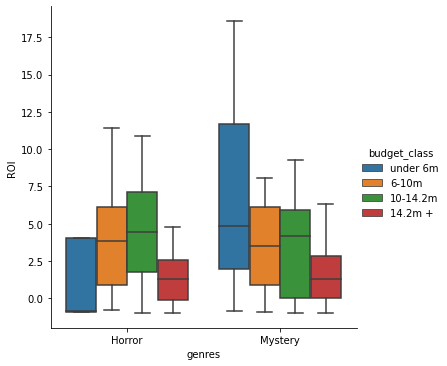

In [67]:
# genres sorted in descending order by average ROI
top_genres = imdb_genre_ROI[['genres', 'ROI']].groupby('genres').mean().sort_values(by = 'ROI', ascending = False)
# top_genres
# imdb_genre_ROI[imdb_genre_ROI['genres'].isin(top_genres.index[:2])]
sns.catplot(x="genres", y="ROI", hue="budget_class", hue_order=['under 6m', '6-10m', '10-14.2m', '14.2m +'], kind="box", showfliers = False, data=imdb_genre_ROI[imdb_genre_ROI['genres'].isin(top_genres.index[:2])])


Highest average ROI is low budget Mystery films.  Also has widest range so most potential.

# Who are the most profitable people in the movie industry?

### Who are the most profitble directors?

In [68]:
# imdb_budgets_df['directors']

#drop rows with no director
imdb_directors_ROI = imdb_budgets_df.dropna(subset = ['directors']).copy()
imdb_directors_ROI['directors'] = imdb_directors_ROI['directors'].apply(lambda x: x.split(','))
imdb_directors_ROI = imdb_directors_ROI.explode('directors')
imdb_directors_meanROI = imdb_directors_ROI[['directors', 'genres', 'ROI']].groupby('directors').mean()
imdb_directors_meanROI.columns = ['director_mean_ROI']
imdb_directors_meanROI = imdb_directors_meanROI.sort_values('director_mean_ROI', ascending = False)
imdb_directors_meanROI = imdb_directors_meanROI[~imdb_directors_meanROI['director_mean_ROI'].duplicated()]

#directors film count
#get number of films per director
director_film_count_df = imdb_directors_ROI[['directors', 'ROI']].groupby('directors').count()
director_film_count_df.columns = ['num_films']

In [69]:
plt_data = imdb_directors_ROI.join(imdb_directors_meanROI, on = 'directors')
plt_data = plt_data.join(director_film_count_df, on = 'directors')

#more than one film
plt_data = plt_data[plt_data['num_films'] > 1]

#top 40 average ROI
plt_data = plt_data[plt_data['directors'].isin(imdb_directors_meanROI.index[:100])]

# never lost money
director_min_ROI = plt_data[['directors','ROI']].groupby('directors').min()
director_min_ROI.columns = ['director_min_ROI']
director_positive_min_ROI = director_min_ROI[director_min_ROI['director_min_ROI'] > 0]

plt_data = plt_data[plt_data['directors'].isin(director_positive_min_ROI.index)]

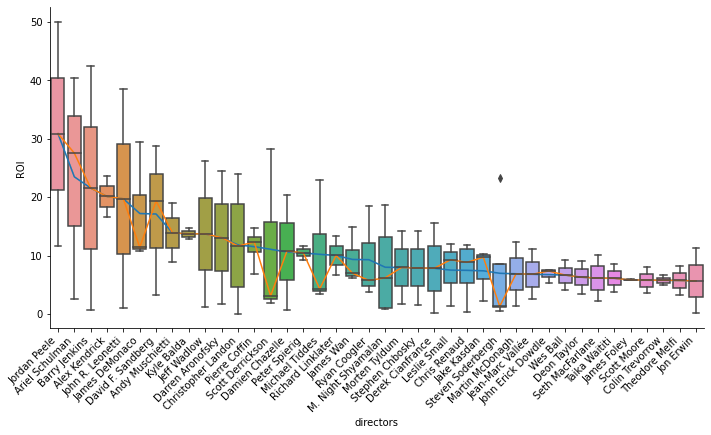

In [70]:


plt_data = plt_data.sort_values(by = 'director_mean_ROI', ascending=False)

#plt_data.sort_values
#director_film_count_df
# plt_data = imdb_directors_ROI[imdb_directors_ROI['directors'].isin(imdb_directors_meanROI.index[:20])]
# plt_data = plt_data[]

ax = sns.catplot(x = "directors", y = "ROI", kind = "box", height = 5, aspect = 2, showfliers = True, data = plt_data)

locs, labels = plt.xticks()

labels = [x.get_text() for x in labels]

named_labels = []
for label in labels:
    named_labels.append(imdb_name_basics.loc[label]['primary_name'])

plt.xticks(np.arange(len(named_labels)), named_labels, rotation = 45, horizontalalignment='right');  # Set text labels.
# print(named_labels)
# plt_data

ax = sns.lineplot(x = "directors", y = "director_mean_ROI", data = plt_data)
ax = sns.lineplot(x = "directors", y = "ROI", data = plt_data[['directors', 'ROI']].groupby('directors').median())


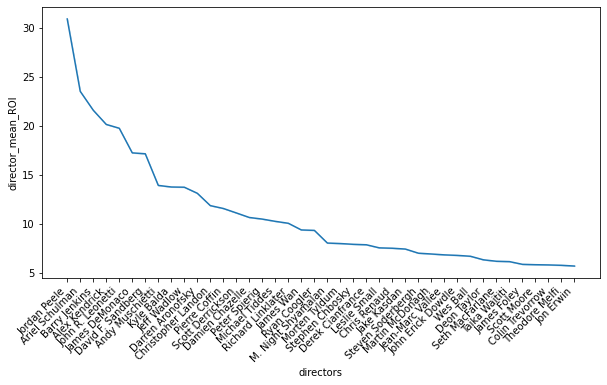

In [71]:
plt.figure(figsize = (10,5))
sns.lineplot(x = "directors", y = "director_mean_ROI", data = plt_data)
plt.xticks(np.arange(len(named_labels)), named_labels, rotation = 45, horizontalalignment='right');  # Set text labels.


In [73]:
director_num_films = imdb_directors_ROI[['directors', 'ROI']].groupby('directors').count()
director_num_films.columns = ['num_films']
director_num_films

,num_films
directors,
nm0000095,4
nm0000108,3
nm0000110,4
nm0000123,2
nm0000127,2
...,...
nm8971368,1
nm9030928,1
nm9039216,1


In [74]:
# imdb_directors_meanROI[imdb_directors_meanROI.index.isin(director_num_films[director_num_films > 1])]

director_num_films[director_num_films['num_films'] > 1]

,num_films
directors,
nm0000095,4
nm0000108,3
nm0000110,4
nm0000123,2
nm0000127,2
...,...
nm2782185,2
nm3227090,3
nm3363032,3


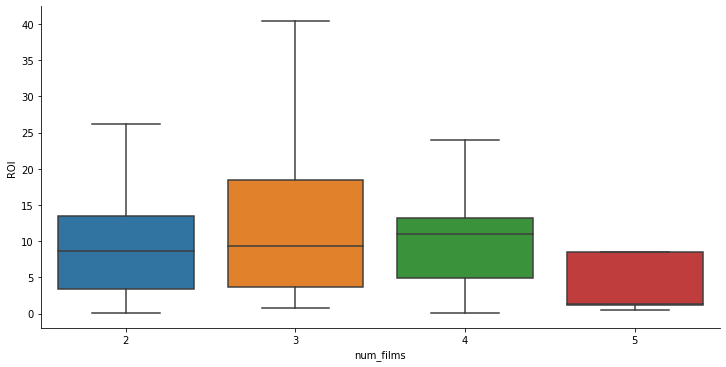

In [75]:
sns.catplot(x="num_films", y="ROI", kind="box", height=5, aspect=2, showfliers = False, data = plt_data)


In [76]:
#how many directors have done 5 films or more?
plt_data[plt_data['num_films'] > 1].count()

release_date         102
movie                102
production_budget    102
domestic_gross       102
worldwide_gross      102
ROI                  102
ROI_zscore           102
year                 102
original_title       102
runtime_minutes      102
genres               102
directors            102
writers              102
averagerating        102
numvotes             102
director_mean_ROI    102
num_films            102
dtype: int64

In [77]:
#how many directors have done 5 films or more?
plt_data[plt_data['num_films'] < 5].count()

release_date         97
movie                97
production_budget    97
domestic_gross       97
worldwide_gross      97
ROI                  97
ROI_zscore           97
year                 97
original_title       97
runtime_minutes      97
genres               97
directors            97
writers              97
averagerating        97
numvotes             97
director_mean_ROI    97
num_films            97
dtype: int64

### How many films does each of the top directors have?

<AxesSubplot:xlabel='directors', ylabel='num_films'>

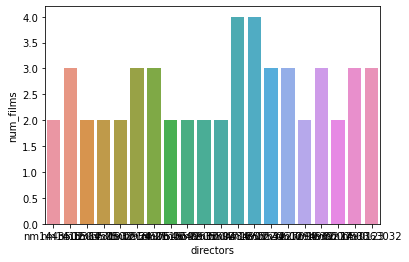

In [78]:
#plt_data = imdb_directors_ROI[imdb_directors_ROI['directors'].isin(imdb_directors_meanROI.index[:20])]


#drop directors with only 1 film
plt_data = plt_data[plt_data['num_films'] > 1]
plt_data = plt_data[plt_data['directors'].isin(imdb_directors_meanROI.index[:50])]

sns.barplot(data=plt_data, x='directors', y = 'num_films')

## Who are the most profitable directors for the genres Horror an Mystery?

### Create a DF of only directors who have never lost money on a film.

In [84]:
director_genre_ROI_df = imdb_budgets_df.loc[:,['directors', 'genres', 'ROI']]
director_genre_ROI_df.dropna(inplace = True)
director_min_ROI.head()


,director_min_ROI
directors,
nm0000500,6.750643
nm0001226,5.751829
nm0001752,0.526354
nm0004716,1.714085
nm0049633,12.796370


### explode function

In [149]:
def imdb_explode (df, cols):
    '''Explode lists separated by commas.  Will throw an error if there are Nan values in the cols'''
    list(cols) # if a single value is pased as a string
    
    if df[cols].isna().sum().sum() > 0:
            raise Exception('Please remove Nan values before calling this function')
    
    # convert the series to list
    for col in cols:        
        df[col] = df[col].map(lambda x: x.split(','))
        df['num_' + col] = df[col].map(lambda x: len(x))
    print(df[cols])
    # repleat loop so there are fewer rows for above loop
    for col in cols:
        df = df.explode(col)
    
    return df

In [155]:
#subset data for this question
plot_data = imdb_budgets_df[['release_date', 'year', 'movie', 'ROI', 'runtime_minutes', 'genres', 'directors', 'numvotes']].head()

plot_data[plot_data['directors'].fillna('').str.contains(',')]



,release_date,year,movie,ROI,runtime_minutes,genres,directors,numvotes
id,,,,,,,,


In [162]:
imdb_budgets_df['directors'].fillna('').str.contains(',').sum()


121

In [163]:
imdb_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,ROI_zscore,year,original_title,runtime_minutes,genres,directors,writers,averagerating,numvotes
id,,,,,,,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,5.532577,0.046157,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,-0.084594,2011,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",6.6,447624.0
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.572108,-0.154097,2019,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",6.0,24451.0
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,-0.028921,2015,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",7.3,665594.0
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696,-0.031878,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = ['genres', 'directors']

#explode directors and genres.
plot_data.dropna(subset = cols, inplace=True)
plot_data = imdb_explode(plot_data, cols)

#Groupby genre, directors, get average by genre.
plot_data['genre_director_mean_ROI'] = plot_data.groupby(cols)['ROI'].transform(lambda x: x.mean())
plot_data
#Create plots in one figure for each genre.

In [148]:
plot_data[plot_data['num_directors'] > 1]

,release_date,year,movie,ROI,runtime_minutes,genres,directors,numvotes,num_genres,num_directors,genre_director_mean_ROI
id,,,,,,,,,,,
